(*清除所有全局变量*)ClearAll["Global`*"]

(*1. 定义系统参数*)
params = {m,(*质量*)J,(*转动惯量*)k1, k2,(*弹簧刚度*)c1, c2,(*阻尼系数*)l1, 
   l2  (*距离参数*)};
SetAttributes[params, Constant]

(*2. 定义广义坐标*)
coordinates = {y[t],(*垂向位移*)\[Theta][t],(*转角位移*)u1[t], u2[t] (*激励位移*)};

(*3. 计算系统动能*)
T = 1/2  m  D[y[t], t]^2 + 1/2  J  D[\[Theta][t], t]^2;

(*4. 计算系统势能*)
V = 1/2  k1  (y[t] - l1  \[Theta][t] - u1[t])^2 + 
   1/2  k2  (y[t] + l2  \[Theta][t] - u2[t])^2;

(*5. 计算耗散函数*)
R = 1/2  c1  (D[y[t], t] - l1  D[\[Theta][t], t] - D[u1[t], t])^2 + 
   1/2  c2  (D[y[t], t] + l2  D[\[Theta][t], t] - D[u2[t], t])^2;
   
   (*应用拉格朗日方程并化简*)
eqns = Simplify[{(*对y的拉格朗日方程*)
    D[D[T, D[y[t], t]], t] - D[T, y[t]] + D[V, y[t]] + 
      D[R, D[y[t], t]] == 0,(*对\[Theta]的拉格朗日方程*)
    D[D[T, D[\[Theta][t], t]], t] - D[T, \[Theta][t]] + 
      D[V, \[Theta][t]] + D[R, D[\[Theta][t], t]] == 0}];

(*提取系数并输出*)
coeffs = 
  Collect[eqns, {y''[t], \[Theta]''[t], y'[t], \[Theta]'[t], 
    y[t], \[Theta][t]}, Simplify];
Print["动力学方程："];
Print[coeffs]

In [ ]:
(*将方程重组为标准形式*)stdEqns = Simplify[eqns /. Equal -> Subtract];

(*提取二阶导数项系数（质量矩阵）*)
M = Table[
   Coefficient[stdEqns[[i]], {y''[t], \[Theta]''[t]}[[j]]], {i, 1, 
    2}, {j, 1, 2}];

(*提取一阶导数项系数（阻尼矩阵）*)
Cd = Table[
   Coefficient[stdEqns[[i]], {y'[t], \[Theta]'[t]}[[j]]], {i, 1, 
    2}, {j, 1, 2}];

(*提取位移项系数（刚度矩阵）*)
K = Table[
   Coefficient[stdEqns[[i]], {y[t], \[Theta][t]}[[j]]], {i, 1, 2}, {j,
     1, 2}];

(*显示结果*)
Print["质量矩阵M = "];
Print[MatrixForm[Simplify[M]]];
Print["阻尼矩阵Cd = "];
Print[MatrixForm[Simplify[Cd]]];
Print["刚度矩阵K = "];
Print[MatrixForm[Simplify[K]]];

g Sin[θ1[t]]             g Sin[θ2[t]]
{{θ1''[t] -> ------------, θ2''[t] -> ------------}}
                  l                        l
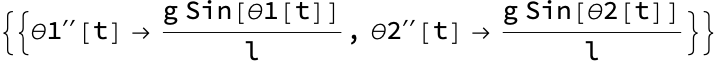

In [201]:
ClearAll["Global`*"]
(* Define symbolic parameters *)
m = Symbol["m"];  (* Mass *)
l = Symbol["l"];  (* Length *)
g = Symbol["g"];  (* Gravitational acceleration *)
t = Symbol["t"];  (* Time *)


(* Define generalized coordinates *)
q = {θ1[t], θ2[t]};  (* Generalized coordinates *)
qd = D[#, t] & /@ q;  (* First derivatives (velocities) *)
qdd = D[#, t] & /@ qd;  (* Second derivatives (accelerations) *)


(* Define kinetic and potential energies *)
T = 1/2 m l^2 (qd[[1]]^2 + qd[[2]]^2);  (* Kinetic energy *)
V = m g l (Cos[θ1[t]] + Cos[θ2[t]]);  (* Potential energy *)

(* Define Lagrangian *)
L = T - V;

(* Define Lagrange equations *)
lagrangeEqns = Table[
  D[D[L, qd[[i]]], t] - D[L, q[[i]]] == 0,
  {i, Length[q]}
];

(* Solve the equations of motion *)
solutions = Solve[lagrangeEqns, qdd];

(* Display the solutions *)
solutions